## Project Detail
- Data wrangling, which consists of:
    - Gathering data
    - Assessing data
    - Cleaning data
- Storing, analyzing, and visualizing our wrangled data
- Reporting on 1) our data wrangling efforts and 2) our data analyses and visualizations

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from collections import Counter
import pandas as pd
import numpy as np
import requests
import json
import time
import os
import re
import tweepy

## Gather Data

### Twitter Archive

In [2]:
# Read a csv file as a Pandas DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Image Predictions

In [4]:
# Download image_predictions.tsv file from Udacity server
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [5]:
with open ('image_predictions.tsv' ,'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')    

In [6]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


 ### Tweets

In [ ]:
# Twitter API for more data (save to local file)
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [ ]:
# Store data on tweet_json.txt
with open('tweet_json.txt', 'w') as outfile: 
    for tweet_id in df_twitter_archive['twitter_ids']:
        try:
            tweet = api.get_status(tweet_id)
            # Convert to JSON and write
            json.dump(tweet._json, outfile)
            outfile.write("\n")
            
        except:  # could be the case the tweet was deleted
            print('ERROR: Error on tweet id {}'.format(tweet_id))
            e = os.sys.exc_info()[0]

In [8]:
# Keep only certain elements in dataframe
elements_to_keep = ['id', 'favorite_count', 'retweet_count']
data = []

with open('tweet_json.txt', 'r') as file: 
    # Read the line from JSON.txt and convert it into dataframe
    tweet_json = file.readline()
    
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        # Create a smaller dict
        data_row = dict((element, tweet_dict[element]) for element in elements_to_keep)
        data.append(data_row)
        
        # Read the next line
        tweet_json = file.readline()
            
df_tweet= pd.DataFrame.from_dict(data)

In [9]:
df_tweet.head()

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


In [10]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Assess Data

In [11]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
# View dog names and counts.
twitter_archive.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Tucker           10
Penny            10
Lola             10
Winston           9
Bo                9
the               8
Sadie             8
Daisy             7
Toby              7
Buddy             7
an                7
Bailey            7
Jack              6
Oscar             6
Milo              6
Dave              6
Rusty             6
Koda              6
Scout             6
Stanley           6
Jax               6
Bella             6
Leo               6
Chester           5
               ... 
Harlso            1
Cedrick           1
Leonard           1
Tango             1
Zoe               1
Miguel            1
Lupe              1
Meera             1
Enchilada         1
Milky             1
Gerbald           1
Tove              1
Lucky             1
Boston            1
Tuco              1
Maks              1
Edd               1
Kuyu              1
Sid               1


In [15]:
# View numerator counts.
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
# View denominator counts.
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
df_tweet

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


## Quality Issues
### twitter_archive
- Wrong data type: **timestamp** and **retweeted_status_timestamp** should be datetime instead of object.
- Wrong data type: **in_reply_to_status_id** ,**in_reply_to_user_id**, **retweeted_status_id**, and **retweeted_status_user_id** should be string instead of float64.
- Retweets: Some entries are retweets. We only want to keep the original.
- Name: In **name** column, many entries do not look like names.
- Rating: The **numerator** and **denominator** columns have strange values.
- Remove columns which are not required for the analysis and store the dataframe to twitter_archive_master.csv

### image_predictions
- Inconsistent capitalization: Some of the first letter in p1/p2/p3 are capital.
- Missing values: 2075 rows instead of 2356

### df_tweet
- Rename **id** column to **tweet_id** to be consistent with **twitter_archive** and **image_predictions**

## Tidiness Issues
- Join **image_predictions** and **df_tweet** to **twitter_archive**.
- **twitter_archive**: one variable in four columns (doggo, floofer, pupper, puppo).

## Clean Data

In [21]:
# Copy dataframes
df_clean_twitter_archive = twitter_archive.copy()
df_clean_image_predictions = image_predictions.copy()
df_clean_tweet = df_tweet.copy()

#### Rename **id** column to **tweet_id** to be consistent with **twitter_archive** and **image_predictions**

In [22]:
df_clean_tweet.rename(columns={'id' : 'tweet_id'}, inplace=True)
df_clean_tweet.columns

Index(['favorite_count', 'tweet_id', 'retweet_count'], dtype='object')

#### Join **image_predictions** and **df_tweet** to **twitter_archive**.

In [23]:
df_clean_twitter_archive = pd.merge(df_clean_twitter_archive, df_clean_image_predictions, on='tweet_id', how='inner')
df_clean_twitter_archive = pd.merge(df_clean_twitter_archive, df_clean_tweet, on='tweet_id', how='inner')
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

#### Retweets: Some entries are retweets. We only want to keep the original.

In [24]:
# Identify retweets
df_clean_twitter_archive[df_clean_twitter_archive['retweeted_status_id'].notnull() == True ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
32,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,...,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True,0,19297
67,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,...,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True,0,83
81,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,...,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False,0,12518
109,867072653475098625,NaN,NaN,2017-05-23 17:40:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,...,0.352946,True,papillon,0.211766,True,Pekinese,0.112952,True,0,135
129,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,...,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True,0,37911
133,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,...,0.933016,False,oscilloscope,0.012591,False,paper_towel,0.011178,False,0,882
170,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,...,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True,0,10706
171,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,...,0.662183,False,purse,0.066505,False,pillow,0.044725,False,0,23
186,847971574464610304,NaN,NaN,2017-04-01 00:39:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @basic_vacek_: I love my new mug easy 13/10...,8.479710e+17,5.970642e+08,2017-04-01 00:36:55 +0000,https://twitter.com/basic_vacek_/status/847971...,...,0.633652,False,cup,0.273392,False,toilet_tissue,0.066656,False,0,482
209,842892208864923648,NaN,NaN,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,https://twitter.com/dog_rates/status/807106840...,...,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,0,56625


In [25]:
# Drop retweets
df_clean_twitter_archive.drop(df_clean_twitter_archive[df_clean_twitter_archive['retweeted_status_id'].notnull() == True ].index, inplace=True)

In [26]:
# Check result
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non

 
 #### Wrong data type: **timestamp** and **retweeted_status_timestamp** should be datetime instead of object.

In [27]:
# Change datetype to datetime64
df_clean_twitter_archive.timestamp = pd.to_datetime(df_clean_twitter_archive.timestamp)
df_clean_twitter_archive.retweeted_status_timestamp = pd.to_datetime(df_clean_twitter_archive.retweeted_status_timestamp)

#### Wrong data type: **in_reply_to_status_id** ,**in_reply_to_user_id**, **retweeted_status_id**, and **retweeted_status_user_id** should be string instead of float64.

In [28]:
# Change datatype to int64
df_clean_twitter_archive['tweet_id'] = df_clean_twitter_archive['tweet_id'].values.astype(np.str)
df_clean_twitter_archive['in_reply_to_status_id'] = df_clean_twitter_archive['in_reply_to_status_id'].values.astype(np.str)
df_clean_twitter_archive['in_reply_to_user_id'] = df_clean_twitter_archive['in_reply_to_user_id'].values.astype(np.str)
df_clean_twitter_archive['retweeted_status_id'] = df_clean_twitter_archive['retweeted_status_id'].values.astype(np.str)
df_clean_twitter_archive['retweeted_status_user_id'] = df_clean_twitter_archive['retweeted_status_user_id'].values.astype(np.str)

# Check results
df_clean_twitter_archive.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
jpg_url                               object
img_num                                int64
p1                                    object
p1_conf                              float64
p1_dog                                  bool
p2        

#### Inconsistent capitalization: Some of the first letter in p1/p2/p3 are capital.

In [29]:
# Lower p1/p2/p3 
df_clean_twitter_archive['p1'] = df_clean_twitter_archive['p1'].str.lower()
df_clean_twitter_archive['p2'] = df_clean_twitter_archive['p2'].str.lower()
df_clean_twitter_archive['p3'] = df_clean_twitter_archive['p3'].str.lower()

# Check results
print(df_clean_twitter_archive['p1'].str.isupper().value_counts(), df_clean_twitter_archive['p2'].str.isupper().value_counts(), df_clean_twitter_archive['p3'].str.isupper().value_counts())

False    1994
Name: p1, dtype: int64 False    1994
Name: p2, dtype: int64 False    1994
Name: p3, dtype: int64


#### **twitter_archive**: one variable in four columns (doggo, floofer, pupper, puppo).

In [30]:
# Melt 'doggo', 'floofer', 'pupper', 'puppo' four columns to one column 'dog_stage'
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
keep_columns = [c for c in df_clean_twitter_archive.columns.tolist() if c not in melt_columns]
df_clean_twitter_archive = pd.melt(df_clean_twitter_archive, id_vars=keep_columns, value_vars=melt_columns, var_name='stage', value_name='dog_stage')
df_clean_twitter_archive = df_clean_twitter_archive.drop('stage', 1)

# Check results
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 27 columns):
tweet_id                      7976 non-null object
in_reply_to_status_id         7976 non-null object
in_reply_to_user_id           7976 non-null object
timestamp                     7976 non-null datetime64[ns]
source                        7976 non-null object
text                          7976 non-null object
retweeted_status_id           7976 non-null object
retweeted_status_user_id      7976 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 7976 non-null object
rating_numerator              7976 non-null int64
rating_denominator            7976 non-null int64
name                          7976 non-null object
jpg_url                       7976 non-null object
img_num                       7976 non-null int64
p1                            7976 non-null object
p1_conf                       7976 non-null float64
p1_dog         

In [31]:
# Drop duplicated rows
df_clean_twitter_archive = df_clean_twitter_archive.drop_duplicates()

In [32]:
# Check the values of 'dog_stage'
df_clean_twitter_archive.dog_stage.value_counts()

None       1994
pupper      212
doggo        74
puppo        23
floofer       8
Name: dog_stage, dtype: int64

#### Name: In name column, many entries do not look like names.

In [33]:
# Replace strange values with None
df_clean_twitter_archive['name'].replace("an",'None', inplace=True)
df_clean_twitter_archive['name'].replace("a",'None', inplace=True)
df_clean_twitter_archive['name'].replace("by",'None', inplace=True)
df_clean_twitter_archive['name'].replace("actually",'None', inplace=True)
df_clean_twitter_archive['name'].replace("old",'None', inplace=True) 
df_clean_twitter_archive['name'].replace("all",'None', inplace=True) 
df_clean_twitter_archive['name'].replace("this",'None', inplace=True) 
df_clean_twitter_archive['name'].replace("very",'None', inplace=True) 
df_clean_twitter_archive['name'].replace("not",'None', inplace=True)
df_clean_twitter_archive['name'].replace("one",'None', inplace=True)
df_clean_twitter_archive['name'].replace("my",'None', inplace=True)
df_clean_twitter_archive['name'].replace("O",'None', inplace=True)
df_clean_twitter_archive['name'].replace("quite","None", inplace=True)
df_clean_twitter_archive['name'].replace("such","None", inplace=True)
df_clean_twitter_archive['name'].replace('the', 'None', inplace=True)
df_clean_twitter_archive['name'].replace("just",'None', inplace=True)
df_clean_twitter_archive['name'].replace("getting",'None', inplace=True) 
df_clean_twitter_archive['name'].replace("infuriating",'None', inplace=True) 

In [34]:
df_clean_twitter_archive['name'].value_counts()

None          774
Cooper         13
Charlie        12
Oliver         12
Lucy           11
Penny           9
Tucker          9
Winston         9
Bo              8
Sadie           8
Daisy           7
Jax             7
Bella           7
Toby            7
Milo            7
Lola            7
Gus             6
Scout           6
Koda            6
Maggie          6
Stanley         6
Sophie          5
Chester         5
Phil            5
Finn            5
Derek           5
Bailey          5
Scooter         5
Buddy           5
Loki            5
             ... 
Asher           1
Stephanus       1
Rumble          1
Champ           1
Tess            1
Jameson         1
Timison         1
Meatball        1
Emmy            1
Kramer          1
Donny           1
Dale            1
DonDon          1
incredibly      1
Katie           1
Kayla           1
Mutt            1
Carter          1
Longfellow      1
Flurpson        1
Rose            1
Glacier         1
Florence        1
Maya            1
Layla     

#### Rating: The numerator and denominator columns have strange values.

In [35]:
df_clean_twitter_archive['rating_denominator'].value_counts()

10     2293
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [36]:
# Select only denominator = 10
df_clean_twitter_archive = df_clean_twitter_archive.query('rating_denominator == 10')
df_clean_twitter_archive['rating_denominator'].value_counts()

10    2293
Name: rating_denominator, dtype: int64

In [37]:
df_clean_twitter_archive['rating_numerator'].value_counts()

12      527
10      478
11      469
13      308
9       167
8       110
7        59
14       50
5        36
6        33
3        20
4        15
2         9
1         4
0         2
27        2
75        1
26        1
1776      1
420       1
Name: rating_numerator, dtype: int64

In [38]:
# Selet only numerator <= 20 and > 0 
df_clean_twitter_archive = df_clean_twitter_archive.query('rating_numerator <= 20 and rating_numerator > 0')
df_clean_twitter_archive['rating_numerator'].value_counts()

12    527
10    478
11    469
13    308
9     167
8     110
7      59
14     50
5      36
6      33
3      20
4      15
2       9
1       4
Name: rating_numerator, dtype: int64

In [39]:
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 6795
Data columns (total 27 columns):
tweet_id                      2285 non-null object
in_reply_to_status_id         2285 non-null object
in_reply_to_user_id           2285 non-null object
timestamp                     2285 non-null datetime64[ns]
source                        2285 non-null object
text                          2285 non-null object
retweeted_status_id           2285 non-null object
retweeted_status_user_id      2285 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2285 non-null object
rating_numerator              2285 non-null int64
rating_denominator            2285 non-null int64
name                          2285 non-null object
jpg_url                       2285 non-null object
img_num                       2285 non-null int64
p1                            2285 non-null object
p1_conf                       2285 non-null float64
p1_dog         

#### Remove columns which are not required for the analysis and store the dataframe to twitter_archive_master.csv

In [40]:
df_clean_twitter_archive.drop(['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','jpg_url','img_num' ], axis=1, inplace=True)
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 6795
Data columns (total 15 columns):
rating_numerator      2285 non-null int64
rating_denominator    2285 non-null int64
name                  2285 non-null object
p1                    2285 non-null object
p1_conf               2285 non-null float64
p1_dog                2285 non-null bool
p2                    2285 non-null object
p2_conf               2285 non-null float64
p2_dog                2285 non-null bool
p3                    2285 non-null object
p3_conf               2285 non-null float64
p3_dog                2285 non-null bool
favorite_count        2285 non-null int64
retweet_count         2285 non-null int64
dog_stage             2285 non-null object
dtypes: bool(3), float64(3), int64(4), object(5)
memory usage: 238.8+ KB


In [41]:
df_clean_twitter_archive.to_csv('twitter_archive_master.csv')

## Analyze data

In [42]:
# Read the clean file and ignore the unname column
df = pd.read_csv('twitter_archive_master.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 6795
Data columns (total 15 columns):
rating_numerator      2285 non-null int64
rating_denominator    2285 non-null int64
name                  2285 non-null object
p1                    2285 non-null object
p1_conf               2285 non-null float64
p1_dog                2285 non-null bool
p2                    2285 non-null object
p2_conf               2285 non-null float64
p2_dog                2285 non-null bool
p3                    2285 non-null object
p3_conf               2285 non-null float64
p3_dog                2285 non-null bool
favorite_count        2285 non-null int64
retweet_count         2285 non-null int64
dog_stage             2285 non-null object
dtypes: bool(3), float64(3), int64(4), object(5)
memory usage: 238.8+ KB


#### What are the top 10 rated dog breeds?

In [43]:
# Extract breed and confidence from p1/p2/p3
breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('unknown')
        conf.append(0)

df.apply(breed_conf, axis = 1)

df['breed'] = breed
df['confidence'] = conf

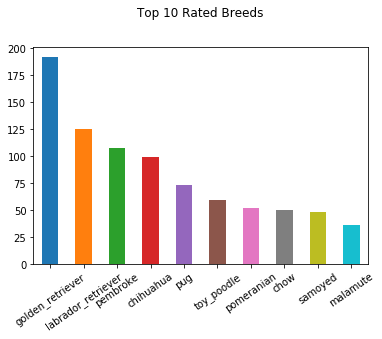

In [58]:
# Ignore 'unknown' and draw a bar char.
top_dog = df[df['breed'] != 'unknown']
top_dog['breed'].value_counts()[0:10].plot(kind='bar', rot=35)
plt.title('Top 10 Rated Breeds');

#### What are the top 5 most common dog names?

In [59]:
Counter(df['name']).most_common(6)

[('None', 755),
 ('Cooper', 13),
 ('Oliver', 12),
 ('Charlie', 12),
 ('Lucy', 11),
 ('Penny', 9)]

Result: top 1 is **Cooper**, top 2 is **Oliver**, top 3 is **Charlie** (None is ignored).

#### What are the correlation between dog_stage and rating numerator?

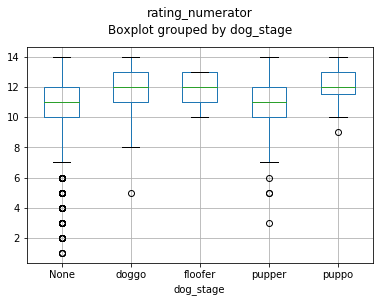

In [51]:
# Increase the distance between title and plot.
rcParams['axes.titlepad'] = 30
df.boxplot(column='rating_numerator', by='dog_stage');

In [47]:
df.groupby('dog_stage')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
None,1969.0,10.559675,2.160393,1.0,10.0,11.0,12.0,14.0
doggo,74.0,11.783784,1.607093,5.0,11.0,12.0,13.0,14.0
floofer,8.0,11.875000,1.125992,10.0,11.0,12.0,13.0,13.0
pupper,211.0,10.649289,1.759393,3.0,10.0,11.0,12.0,14.0
puppo,23.0,12.043478,1.296087,9.0,11.5,12.0,13.0,14.0
